In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
from plotly.io import write_html
import plotly.graph_objects as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import statsmodels.api as sm
import os

## Figure 6: Re-running Regression of Change in Recipiency Rate against Percent Change in Real WBA, **weighted by size of state labor force**

In [23]:
#os.chdir(r'C:\Users\darkf\OneDrive\Documents\GitHub\UI-Inflation')
#laborforce = pd.read_csv("laborforce.csv")


In [26]:
laborforce = laborforce[laborforce['State'] != "VI"]
laborforce['Civilian Labor Force(000)'] = laborforce['Civilian Labor Force(000)'].str.replace(',', '', regex=False).astype(int)
laborforce.to_csv('laborforce.csv', index=False)

In [35]:
avg_laborforce = (laborforce.groupby("State")['Civilian Labor Force(000)'].apply('mean') * 1000).round()
len(avg_laborforce)

52

In [37]:
percent_changes = pd.read_csv("percent_changes.csv")
percent_changes.head()

,Unnamed: 0,State,Change in Recipiency Rate (2000-2023),% Change in Recipiency Rate (2000-2023),Change in Real Average WBA (2000-2023),Change in Real Maximum WBA (2000-2023),% Change in Real Average WBA (2000-2023),% Change in Real Maximum WBA (2000-2023),% Change in Real Minimum WBA (2000-2023),Change in Recipiency Rate (2001-2023),...,% Change in Real Average WBA (2017-2023),% Change in Real Maximum WBA (2017-2023),% Change in Real Minimum WBA (2017-2023),Change in Recipiency Rate (2018-2023),% Change in Recipiency Rate (2018-2023),Change in Real Average WBA (2018-2023),Change in Real Maximum WBA (2018-2023),% Change in Real Average WBA (2018-2023),% Change in Real Maximum WBA (2018-2023),% Change in Real Minimum WBA (2018-2023)
0,0,AK,-35.127071,-57.698873,-16.58,-48.28,-9.836260,-19.467742,-31.295455,-34.688606,...,-13.652633,-21.336012,-21.337497,-7.711410,-23.043667,-13.36,-45.95,-8.080319,-18.703952,-18.692846
1,1,AL,-12.997964,-44.500523,-22.64,-34.88,-13.793944,-18.357895,-43.600000,-18.606607,...,-10.776895,-16.865856,-19.911644,-2.678461,-14.179960,-13.97,-27.42,-8.986234,-15.021365,-18.129032
2,2,AR,-24.383506,-53.772333,-37.67,-54.61,-17.810875,-17.673139,-16.927273,-36.687743,...,-11.229701,-19.892304,-19.884271,-3.622715,-14.735449,-13.77,-56.26,-7.340085,-18.110414,-18.103603
3,3,AZ,-2.452821,-11.923732,-8.74,-32.27,-4.956615,-15.741463,191.475000,-8.457287,...,6.217518,4.881899,34.848485,2.383332,15.146920,12.72,13.38,8.213340,8.396611,7.071356
4,4,CA,1.377678,3.361902,43.93,12.90,26.843874,5.608696,-46.025000,-4.154545,...,-9.409095,-21.338126,-21.347905,2.233244,5.565918,-21.03,-55.89,-9.199073,-18.705445,-18.712349


In [40]:
pct_changes_laborforce = percent_changes.merge(avg_laborforce, on="State", how='left')
pct_changes_laborforce = pct_changes_laborforce.rename(columns={'Civilian Labor Force(000)': 'Civilian Labor Force'})
pct_changes_laborforce.head()

,Unnamed: 0,State,Change in Recipiency Rate (2000-2023),% Change in Recipiency Rate (2000-2023),Change in Real Average WBA (2000-2023),Change in Real Maximum WBA (2000-2023),% Change in Real Average WBA (2000-2023),% Change in Real Maximum WBA (2000-2023),% Change in Real Minimum WBA (2000-2023),Change in Recipiency Rate (2001-2023),...,% Change in Real Maximum WBA (2017-2023),% Change in Real Minimum WBA (2017-2023),Change in Recipiency Rate (2018-2023),% Change in Recipiency Rate (2018-2023),Change in Real Average WBA (2018-2023),Change in Real Maximum WBA (2018-2023),% Change in Real Average WBA (2018-2023),% Change in Real Maximum WBA (2018-2023),% Change in Real Minimum WBA (2018-2023),Civilian Labor Force
0,0,AK,-35.127071,-57.698873,-16.58,-48.28,-9.836260,-19.467742,-31.295455,-34.688606,...,-21.336012,-21.337497,-7.711410,-23.043667,-13.36,-45.95,-8.080319,-18.703952,-18.692846,354655.0
1,1,AL,-12.997964,-44.500523,-22.64,-34.88,-13.793944,-18.357895,-43.600000,-18.606607,...,-16.865856,-19.911644,-2.678461,-14.179960,-13.97,-27.42,-8.986234,-15.021365,-18.129032,2196500.0
2,2,AR,-24.383506,-53.772333,-37.67,-54.61,-17.810875,-17.673139,-16.927273,-36.687743,...,-19.892304,-19.884271,-3.622715,-14.735449,-13.77,-56.26,-7.340085,-18.110414,-18.103603,1342190.0
3,3,AZ,-2.452821,-11.923732,-8.74,-32.27,-4.956615,-15.741463,191.475000,-8.457287,...,4.881899,34.848485,2.383332,15.146920,12.72,13.38,8.213340,8.396611,7.071356,3176321.0
4,4,CA,1.377678,3.361902,43.93,12.90,26.843874,5.608696,-46.025000,-4.154545,...,-21.338126,-21.347905,2.233244,5.565918,-21.03,-55.89,-9.199073,-18.705445,-18.712349,18515964.0


### Elasticity like relationship

In [158]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = sm.add_constant(pct_changes_laborforce['% Change in Real Average WBA (2003-2023)'])
y = pct_changes_laborforce['% Change in Recipiency Rate (2003-2023)']
w = pct_changes_laborforce['Civilian Labor Force']

model = sm.WLS(y, X, weights=w).fit()

# Summary
print(model.summary())
r_squared_avg = model.rsquared
slope_avg = model.params[1]

                                       WLS Regression Results                                      
Dep. Variable:     % Change in Recipiency Rate (2003-2023)   R-squared:                       0.172
Model:                                                 WLS   Adj. R-squared:                  0.156
Method:                                      Least Squares   F-statistic:                     10.40
Date:                                     Mon, 19 May 2025   Prob (F-statistic):            0.00222
Time:                                             15:40:41   Log-Likelihood:                -244.88
No. Observations:                                       52   AIC:                             493.8
Df Residuals:                                           50   BIC:                             497.7
Df Model:                                                1                                         
Covariance Type:                                 nonrobust                                         


In [129]:
X = sm.add_constant(pct_changes_laborforce[['% Change in Real Maximum WBA (2003-2023)']])
y = pct_changes_laborforce['% Change in Recipiency Rate (2003-2023)']
w = pct_changes_laborforce['Civilian Labor Force']

model = sm.WLS(y, X, weights=w).fit()

# Summary
print(model.summary())
r_squared_max = model.rsquared
slope_max = model.params[1]

                                       WLS Regression Results                                      
Dep. Variable:     % Change in Recipiency Rate (2003-2023)   R-squared:                       0.062
Model:                                                 WLS   Adj. R-squared:                  0.044
Method:                                      Least Squares   F-statistic:                     3.332
Date:                                     Sun, 18 May 2025   Prob (F-statistic):             0.0739
Time:                                             23:06:50   Log-Likelihood:                -248.12
No. Observations:                                       52   AIC:                             500.2
Df Residuals:                                           50   BIC:                             504.1
Df Model:                                                1                                         
Covariance Type:                                 nonrobust                                         


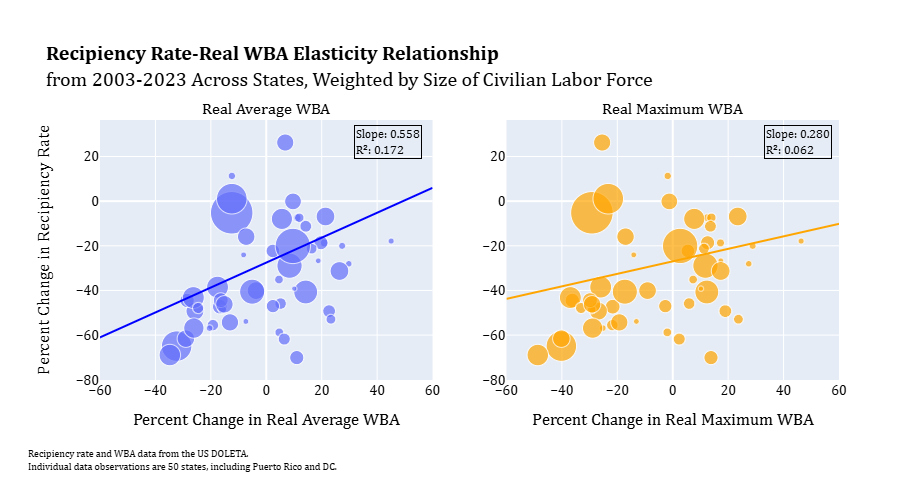

In [130]:
X = sm.add_constant(pct_changes_laborforce[['% Change in Real Maximum WBA (2003-2023)']])
y = pct_changes_laborforce['% Change in Recipiency Rate (2003-2023)']
w = pct_changes_laborforce['Civilian Labor Force']

model = sm.WLS(y, X, weights=w).fit()

x_range = np.linspace(-60, 60, 100)
x_pred = pd.DataFrame({
    'const': 1,  # matches sm.add_constant()
    X.columns[1]: x_range
})
y_pred = model.predict(x_pred)
x_pred = x_pred[f'{X.columns[1]}']

X = sm.add_constant(pct_changes_laborforce[['% Change in Real Average WBA (2003-2023)']])
y = pct_changes_laborforce['% Change in Recipiency Rate (2003-2023)']
w = pct_changes_laborforce['Civilian Labor Force']

model = sm.WLS(y, X, weights=w).fit()

x_range2 = np.linspace(-60, 60, 100)
x_pred2 = pd.DataFrame({
    'const': 1,
    X.columns[1]: x_range2
})
y_pred2 = model.predict(x_pred2)
x_pred2 = x_pred2[f'{X.columns[1]}']

fig1 = px.scatter(data_frame = pct_changes_laborforce,
                 x = '% Change in Real Average WBA (2003-2023)',
                 y = '% Change in Recipiency Rate (2003-2023)',
                 size = 'Civilian Labor Force',
                 size_max = 30,
                 hover_data = ['State'],
                 height=500)
fig1.add_trace(go.Scatter(
    x=x_pred2,
    y=y_pred2,
    mode='lines',
    line=dict(color='blue', width=2),
    opacity=1,
    showlegend=False
))

fig2 = px.scatter(data_frame = pct_changes_laborforce,
                 x = '% Change in Real Maximum WBA (2003-2023)',
                 y = '% Change in Recipiency Rate (2003-2023)',
                 size = 'Civilian Labor Force',
                 size_max = 30,
                 hover_data = ['State'],
                 height=500,
                 color_discrete_sequence=['rgba(255, 165, 0,1)'])

fig2.add_trace(go.Scatter(
    x=x_pred,
    y=y_pred,
    mode='lines',
    line=dict(color='orange', width=2),
    opacity=1,
    showlegend=False
))

fig = make_subplots(rows=1, cols=2, subplot_titles=("Real Average WBA", "Real Maximum WBA"))

# Add traces from fig1 to subplot 1
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

# Add traces from fig2 to subplot 2
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
    
fig.update_layout(title_text="<b>Recipiency Rate-Real WBA Elasticity Relationship</b> <br>from 2003-2023 Across States, Weighted by Size of Civilian Labor Force",
                   yaxis_title="Percent Change in Recipiency Rate",
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    )
                  )

fig.update_layout(height=500)
tickvals=[-60, -40, -20, 0, 20, 40, 60]
fig.update_xaxes(title_text="Percent Change in Real Average WBA", tickvals=tickvals, row=1, col=1)
fig.update_xaxes(title_text="Percent Change in Real Maximum WBA", tickvals=tickvals, row=1, col=2)
fig.add_annotation(
    text='Recipiency rate and WBA data from the US DOLETA. <br>Individual data observations are 50 states, including Puerto Rico and DC.',
    showarrow=False,
    xref="paper",
    yref="paper",
    x=-0.1,
    y=-0.25,
    xanchor="left",
    yanchor="top",
    font=dict(size=10),
    align="left"
)
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.99, y=0.98,
    text=f"Slope: {slope_max:.3f}<br>R²: {r_squared_max:.3f}",
    showarrow=False,
    font=dict(size=12, color="black"),
    align="left",
    bordercolor="black",
    borderwidth=1
)
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.39, y=0.98,
    text=f"Slope: {slope_avg:.3f}<br>R²: {r_squared_avg:.3f}",
    showarrow=False,
    font=dict(size=12, color="black"),
    align="left",
    bordercolor="black",
    borderwidth=1
)
fig.update_layout(margin={"l":100,"b":120, "t":120})
fig.show()

In [132]:
write_html(fig, 'fig_6.1.html')

### Against Absolute change in recipiency

In [133]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = sm.add_constant(pct_changes_laborforce['% Change in Real Average WBA (2003-2023)'])
y = pct_changes_laborforce['Change in Recipiency Rate (2003-2023)']
w = pct_changes_laborforce['Civilian Labor Force']

model = sm.WLS(y, X, weights=w).fit()

# Summary
print(model.summary())
r_squared_avg = model.rsquared
slope_avg = model.params[1]

                                      WLS Regression Results                                     
Dep. Variable:     Change in Recipiency Rate (2003-2023)   R-squared:                       0.119
Model:                                               WLS   Adj. R-squared:                  0.102
Method:                                    Least Squares   F-statistic:                     6.780
Date:                                   Sun, 18 May 2025   Prob (F-statistic):             0.0121
Time:                                           23:07:38   Log-Likelihood:                -198.13
No. Observations:                                     52   AIC:                             400.3
Df Residuals:                                         50   BIC:                             404.2
Df Model:                                              1                                         
Covariance Type:                               nonrobust                                         
                    

In [134]:
X = sm.add_constant(pct_changes_laborforce[['% Change in Real Maximum WBA (2003-2023)']])
y = pct_changes_laborforce['Change in Recipiency Rate (2003-2023)']
w = pct_changes_laborforce['Civilian Labor Force']

model = sm.WLS(y, X, weights=w).fit()

# Summary
print(model.summary())
r_squared_max = model.rsquared
slope_max = model.params[1]

                                      WLS Regression Results                                     
Dep. Variable:     Change in Recipiency Rate (2003-2023)   R-squared:                       0.041
Model:                                               WLS   Adj. R-squared:                  0.022
Method:                                    Least Squares   F-statistic:                     2.139
Date:                                   Sun, 18 May 2025   Prob (F-statistic):              0.150
Time:                                           23:07:41   Log-Likelihood:                -200.35
No. Observations:                                     52   AIC:                             404.7
Df Residuals:                                         50   BIC:                             408.6
Df Model:                                              1                                         
Covariance Type:                               nonrobust                                         
                    

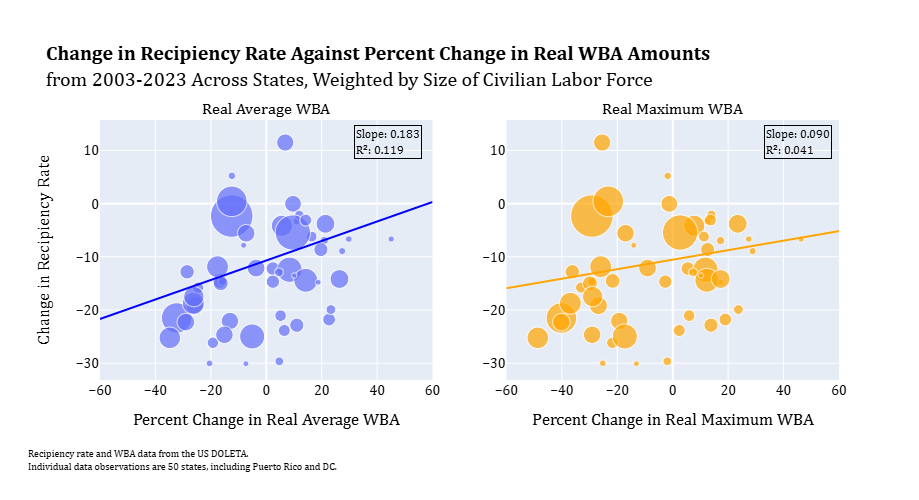

In [135]:
X = sm.add_constant(pct_changes_laborforce[['% Change in Real Maximum WBA (2003-2023)']])
y = pct_changes_laborforce['Change in Recipiency Rate (2003-2023)']
w = pct_changes_laborforce['Civilian Labor Force']

model = sm.WLS(y, X, weights=w).fit()

x_range = np.linspace(-60, 60, 100)
x_pred = pd.DataFrame({
    'const': 1,  # matches sm.add_constant()
    X.columns[1]: x_range
})
y_pred = model.predict(x_pred)
x_pred = x_pred[f'{X.columns[1]}']

X = sm.add_constant(pct_changes_laborforce[['% Change in Real Average WBA (2003-2023)']])
y = pct_changes_laborforce['Change in Recipiency Rate (2003-2023)']
w = pct_changes_laborforce['Civilian Labor Force']

model = sm.WLS(y, X, weights=w).fit()

x_range2 = np.linspace(-60, 60, 100)
x_pred2 = pd.DataFrame({
    'const': 1,
    X.columns[1]: x_range2
})
y_pred2 = model.predict(x_pred2)
x_pred2 = x_pred2[f'{X.columns[1]}']

fig1 = px.scatter(data_frame = pct_changes_laborforce,
                 x = '% Change in Real Average WBA (2003-2023)',
                 y = 'Change in Recipiency Rate (2003-2023)',
                 size = 'Civilian Labor Force',
                 size_max = 30,
                 hover_data = ['State'],
                 height=500)
fig1.add_trace(go.Scatter(
    x=x_pred2,
    y=y_pred2,
    mode='lines',
    line=dict(color='blue', width=2),
    opacity=1,
    showlegend=False
))

fig2 = px.scatter(data_frame = pct_changes_laborforce,
                 x = '% Change in Real Maximum WBA (2003-2023)',
                 y = 'Change in Recipiency Rate (2003-2023)',
                 size = 'Civilian Labor Force',
                 size_max = 30,
                 hover_data = ['State'],
                 height=500,
                 color_discrete_sequence=['rgba(255, 165, 0,1)'])

fig2.add_trace(go.Scatter(
    x=x_pred,
    y=y_pred,
    mode='lines',
    line=dict(color='orange', width=2),
    opacity=1,
    showlegend=False
))

fig = make_subplots(rows=1, cols=2, subplot_titles=("Real Average WBA", "Real Maximum WBA"))

# Add traces from fig1 to subplot 1
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

# Add traces from fig2 to subplot 2
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
    
fig.update_layout(title_text="<b>Change in Recipiency Rate Against Percent Change in Real WBA Amounts</b> <br>from 2003-2023 Across States, Weighted by Size of Civilian Labor Force",
                   yaxis_title="Change in Recipiency Rate",
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    )
                  )

fig.update_layout(height=500)
tickvals=[-60, -40, -20, 0, 20, 40, 60]
fig.update_xaxes(title_text="Percent Change in Real Average WBA", tickvals=tickvals, row=1, col=1)
fig.update_xaxes(title_text="Percent Change in Real Maximum WBA", tickvals=tickvals, row=1, col=2)
fig.add_annotation(
    text='Recipiency rate and WBA data from the US DOLETA. <br>Individual data observations are 50 states, including Puerto Rico and DC.',
    showarrow=False,
    xref="paper",
    yref="paper",
    x=-0.1,
    y=-0.25,
    xanchor="left",
    yanchor="top",
    font=dict(size=10),
    align="left"
)
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.99, y=0.98,
    text=f"Slope: {slope_max:.3f}<br>R²: {r_squared_max:.3f}",
    showarrow=False,
    font=dict(size=12, color="black"),
    align="left",
    bordercolor="black",
    borderwidth=1
)
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.39, y=0.98,
    text=f"Slope: {slope_avg:.3f}<br>R²: {r_squared_avg:.3f}",
    showarrow=False,
    font=dict(size=12, color="black"),
    align="left",
    bordercolor="black",
    borderwidth=1
)
fig.update_layout(margin={"l":100,"b":120, "t":120})
fig.show()

In [136]:
write_html(fig, 'fig_6.2.html')

### Using State CPI Real Values

In [100]:
percent_changes_state = pd.read_csv('percent_changes_state.csv')

In [103]:
pct_changes_state_laborforce = percent_changes_state.merge(avg_laborforce, on="State", how='left')
pct_changes_state_laborforce = pct_changes_state_laborforce.rename(columns={'Civilian Labor Force(000)': 'Civilian Labor Force'})
pct_changes_state_laborforce.head()

,Unnamed: 0,State,Change in Recipiency Rate (2000-2017),% Change in Recipiency Rate (2000-2017),Change in Real Average WBA (2000-2017),Change in Real Maximum WBA (2000-2017),% Change in Real Average WBA (2000-2017),% Change in Real Maximum WBA (2000-2017),% Change in Real Minimum WBA (2000-2017),Change in Recipiency Rate (2001-2017),...,% Change in Real Maximum WBA (2013-2017),% Change in Real Minimum WBA (2013-2017),Change in Recipiency Rate (2014-2017),% Change in Recipiency Rate (2014-2017),Change in Real Average WBA (2014-2017),Change in Real Maximum WBA (2014-2017),% Change in Real Average WBA (2014-2017),% Change in Real Maximum WBA (2014-2017),% Change in Real Minimum WBA (2014-2017),Civilian Labor Force
0,0,AK,-24.848761,-40.815971,0.23,-4.52,0.136450,-1.822581,-16.250,-24.410296,...,-7.182068,-7.178841,-7.337538,-16.918944,4.43,-8.91,2.695303,-3.530251,-3.534031,354655.0
1,1,AL,-11.015258,-37.712424,-9.63,-8.21,-5.867300,-4.321053,-31.400,-16.623901,...,-2.499330,-2.495262,-0.999319,-5.206788,3.81,-2.14,2.528370,-1.163486,-1.152738,2196500.0
2,2,AR,-17.373236,-38.312760,2.64,38.27,1.248227,12.385113,13.400,-29.677472,...,-3.337416,-3.332300,-2.801736,-9.104135,-21.87,-13.26,-9.266557,-3.677919,-3.675676,1342190.0
3,4,CA,-2.884023,-7.037787,57.68,68.27,35.245952,29.682609,-33.725,-8.416246,...,-6.342827,-6.358177,7.318541,23.779598,2.87,-16.01,1.313742,-5.094184,-5.118110,18515964.0
4,5,CO,6.882470,29.420274,7.45,-16.51,2.876226,-4.899110,-37.880,0.541759,...,5.486801,-4.723926,5.043847,19.989682,26.85,15.44,11.205242,5.061465,-2.018927,2840452.0


In [137]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = sm.add_constant(pct_changes_state_laborforce['% Change in Real Average WBA (2003-2017)'])
y = pct_changes_state_laborforce['Change in Recipiency Rate (2003-2017)']
w = pct_changes_state_laborforce['Civilian Labor Force']

model = sm.WLS(y, X, weights=w).fit()

# Summary
print(model.summary())
r_squared_avg = model.rsquared
slope_avg = model.params[1]

x_range2 = np.linspace(-60, 60, 100)
x_pred2 = pd.DataFrame({
    'const': 1,
    X.columns[1]: x_range2
})
y_pred2 = model.predict(x_pred2)
x_pred2 = x_pred2[f'{X.columns[1]}']

                                      WLS Regression Results                                     
Dep. Variable:     Change in Recipiency Rate (2003-2017)   R-squared:                       0.224
Model:                                               WLS   Adj. R-squared:                  0.199
Method:                                    Least Squares   F-statistic:                     8.951
Date:                                   Sun, 18 May 2025   Prob (F-statistic):            0.00540
Time:                                           23:08:27   Log-Likelihood:                -113.41
No. Observations:                                     33   AIC:                             230.8
Df Residuals:                                         31   BIC:                             233.8
Df Model:                                              1                                         
Covariance Type:                               nonrobust                                         
                    

In [138]:
X = sm.add_constant(pct_changes_state_laborforce['% Change in Real Maximum WBA (2003-2017)'])
y = pct_changes_state_laborforce['Change in Recipiency Rate (2003-2017)']
w = pct_changes_state_laborforce['Civilian Labor Force']

model = sm.WLS(y, X, weights=w).fit()

# Summary
print(model.summary())
r_squared_max = model.rsquared
slope_max = model.params[1]

x_range = np.linspace(-60, 60, 100)
x_pred = pd.DataFrame({
    'const': 1,  # matches sm.add_constant()
    X.columns[1]: x_range
})
y_pred = model.predict(x_pred)
x_pred = x_pred[f'{X.columns[1]}']

                                      WLS Regression Results                                     
Dep. Variable:     Change in Recipiency Rate (2003-2017)   R-squared:                       0.136
Model:                                               WLS   Adj. R-squared:                  0.108
Method:                                    Least Squares   F-statistic:                     4.889
Date:                                   Sun, 18 May 2025   Prob (F-statistic):             0.0345
Time:                                           23:08:28   Log-Likelihood:                -115.18
No. Observations:                                     33   AIC:                             234.4
Df Residuals:                                         31   BIC:                             237.4
Df Model:                                              1                                         
Covariance Type:                               nonrobust                                         
                    

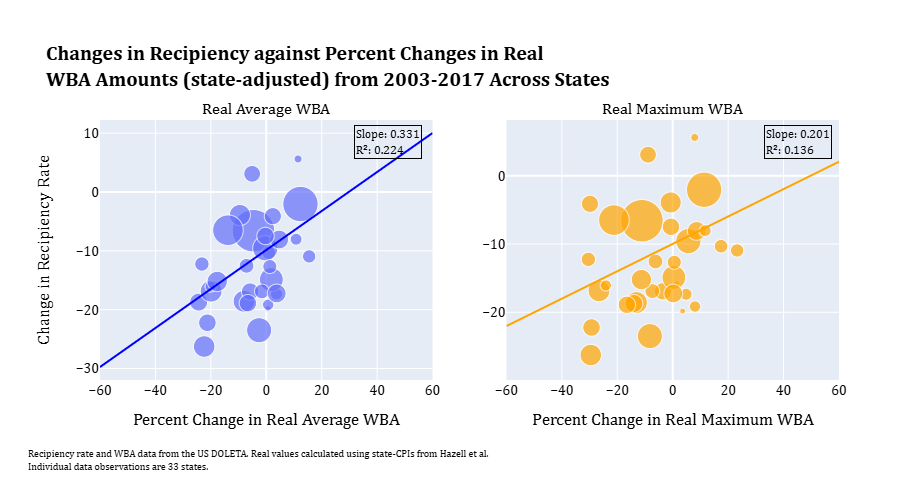

In [139]:
fig1 = px.scatter(data_frame = pct_changes_state_laborforce,
                 x = '% Change in Real Average WBA (2003-2017)',
                 y = 'Change in Recipiency Rate (2003-2017)',
                 size = 'Civilian Labor Force',
                 size_max = 30,
                 hover_data = ['State'],
                 height=500)
fig1.add_trace(go.Scatter(
    x=x_pred2,
    y=y_pred2,
    mode='lines',
    line=dict(color='blue', width=2),
    opacity=1,
    showlegend=False
))

fig2 = px.scatter(data_frame = pct_changes_state_laborforce,
                 x = '% Change in Real Maximum WBA (2003-2017)',
                 y = 'Change in Recipiency Rate (2003-2017)',
                 size = 'Civilian Labor Force',
                 size_max = 30,
                 hover_data = ['State'],
                 height=500,
                 color_discrete_sequence=['rgba(255, 165, 0,1)'])

fig2.add_trace(go.Scatter(
    x=x_pred,
    y=y_pred,
    mode='lines',
    line=dict(color='orange', width=2),
    opacity=1,
    showlegend=False
))

fig = make_subplots(rows=1, cols=2, subplot_titles=("Real Average WBA", "Real Maximum WBA"))

# Add traces from fig1 to subplot 1
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

# Add traces from fig2 to subplot 2
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
    
fig.update_layout(title_text="<b>Changes in Recipiency against Percent Changes in Real <br>WBA Amounts (state-adjusted) from 2003-2017 Across States",
                   yaxis_title="Change in Recipiency Rate",
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    )
                  )

fig.update_layout(height=500)
tickvals=[-60, -40, -20, 0, 20, 40, 60]
fig.update_xaxes(title_text="Percent Change in Real Average WBA", tickvals=tickvals, row=1, col=1)
fig.update_xaxes(title_text="Percent Change in Real Maximum WBA", tickvals=tickvals, row=1, col=2)
fig.add_annotation(
    text='Recipiency rate and WBA data from the US DOLETA. Real values calculated using state-CPIs from Hazell et al. <br>Individual data observations are 33 states.',
    showarrow=False,
    xref="paper",
    yref="paper",
    x=-0.1,
    y=-0.25,
    xanchor="left",
    yanchor="top",
    font=dict(size=10),
    align="left"
)
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.99, y=0.98,
    text=f"Slope: {slope_max:.3f}<br>R²: {r_squared_max:.3f}",
    showarrow=False,
    font=dict(size=12, color="black"),
    align="left",
    bordercolor="black",
    borderwidth=1
)
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.39, y=0.98,
    text=f"Slope: {slope_avg:.3f}<br>R²: {r_squared_avg:.3f}",
    showarrow=False,
    font=dict(size=12, color="black"),
    align="left",
    bordercolor="black",
    borderwidth=1
)
fig.update_layout(margin={"l":100,"b":120, "t":120})
fig.show()

In [140]:
write_html(fig, 'fig_6.3.html')

### Elasticity Type Relationship (state CPIs)

In [141]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = sm.add_constant(pct_changes_state_laborforce['% Change in Real Average WBA (2003-2017)'])
y = pct_changes_state_laborforce['% Change in Recipiency Rate (2003-2017)']
w = pct_changes_state_laborforce['Civilian Labor Force']

model = sm.WLS(y, X, weights=w).fit()

# Summary
print(model.summary())
r_squared_avg = model.rsquared
slope_avg = model.params[1]

x_range2 = np.linspace(-60, 60, 100)
x_pred2 = pd.DataFrame({
    'const': 1,
    X.columns[1]: x_range2
})
y_pred2 = model.predict(x_pred2)
x_pred2 = x_pred2[f'{X.columns[1]}']

                                       WLS Regression Results                                      
Dep. Variable:     % Change in Recipiency Rate (2003-2017)   R-squared:                       0.262
Model:                                                 WLS   Adj. R-squared:                  0.238
Method:                                      Least Squares   F-statistic:                     10.99
Date:                                     Sun, 18 May 2025   Prob (F-statistic):            0.00234
Time:                                             23:09:00   Log-Likelihood:                -144.51
No. Observations:                                       33   AIC:                             293.0
Df Residuals:                                           31   BIC:                             296.0
Df Model:                                                1                                         
Covariance Type:                                 nonrobust                                         


In [142]:
X = sm.add_constant(pct_changes_state_laborforce['% Change in Real Maximum WBA (2003-2017)'])
y = pct_changes_state_laborforce['% Change in Recipiency Rate (2003-2017)']
w = pct_changes_state_laborforce['Civilian Labor Force']

model = sm.WLS(y, X, weights=w).fit()

# Summary
print(model.summary())
r_squared_max = model.rsquared
slope_max = model.params[1]

x_range = np.linspace(-60, 60, 100)
x_pred = pd.DataFrame({
    'const': 1,  # matches sm.add_constant()
    X.columns[1]: x_range
})
y_pred = model.predict(x_pred)
x_pred = x_pred[f'{X.columns[1]}']

                                       WLS Regression Results                                      
Dep. Variable:     % Change in Recipiency Rate (2003-2017)   R-squared:                       0.146
Model:                                                 WLS   Adj. R-squared:                  0.119
Method:                                      Least Squares   F-statistic:                     5.319
Date:                                     Sun, 18 May 2025   Prob (F-statistic):             0.0279
Time:                                             23:09:02   Log-Likelihood:                -146.90
No. Observations:                                       33   AIC:                             297.8
Df Residuals:                                           31   BIC:                             300.8
Df Model:                                                1                                         
Covariance Type:                                 nonrobust                                         


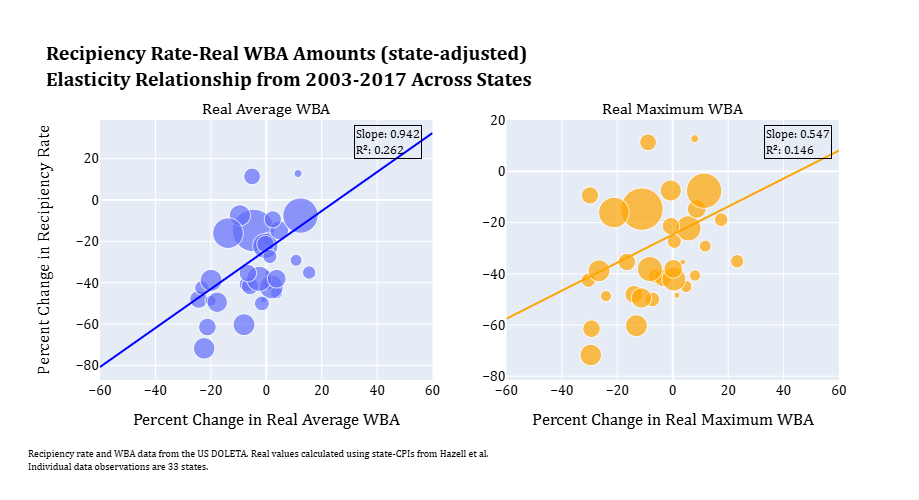

In [143]:
fig1 = px.scatter(data_frame = pct_changes_state_laborforce,
                 x = '% Change in Real Average WBA (2003-2017)',
                 y = '% Change in Recipiency Rate (2003-2017)',
                 size = 'Civilian Labor Force',
                 size_max = 30,
                 hover_data = ['State'],
                 height=500)
fig1.add_trace(go.Scatter(
    x=x_pred2,
    y=y_pred2,
    mode='lines',
    line=dict(color='blue', width=2),
    opacity=1,
    showlegend=False
))

fig2 = px.scatter(data_frame = pct_changes_state_laborforce,
                 x = '% Change in Real Maximum WBA (2003-2017)',
                 y = '% Change in Recipiency Rate (2003-2017)',
                 size = 'Civilian Labor Force',
                 size_max = 30,
                 hover_data = ['State'],
                 height=500,
                 color_discrete_sequence=['rgba(255, 165, 0,1)'])

fig2.add_trace(go.Scatter(
    x=x_pred,
    y=y_pred,
    mode='lines',
    line=dict(color='orange', width=2),
    opacity=1,
    showlegend=False
))

fig = make_subplots(rows=1, cols=2, subplot_titles=("Real Average WBA", "Real Maximum WBA"))

# Add traces from fig1 to subplot 1
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)

# Add traces from fig2 to subplot 2
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
    
fig.update_layout(title_text="<b>Recipiency Rate-Real WBA Amounts (state-adjusted) <br>Elasticity Relationship from 2003-2017 Across States",
                   yaxis_title="Percent Change in Recipiency Rate",
                   font=dict(
                        family="Cambria",  
                        size=14,         
                        color="black",
                    )
                  )

fig.update_layout(height=500)
tickvals=[-60, -40, -20, 0, 20, 40, 60]
fig.update_xaxes(title_text="Percent Change in Real Average WBA", tickvals=tickvals, row=1, col=1)
fig.update_xaxes(title_text="Percent Change in Real Maximum WBA", tickvals=tickvals, row=1, col=2)
fig.add_annotation(
    text='Recipiency rate and WBA data from the US DOLETA. Real values calculated using state-CPIs from Hazell et al. <br>Individual data observations are 33 states.',
    showarrow=False,
    xref="paper",
    yref="paper",
    x=-0.1,
    y=-0.25,
    xanchor="left",
    yanchor="top",
    font=dict(size=10),
    align="left"
)
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.99, y=0.98,
    text=f"Slope: {slope_max:.3f}<br>R²: {r_squared_max:.3f}",
    showarrow=False,
    font=dict(size=12, color="black"),
    align="left",
    bordercolor="black",
    borderwidth=1
)
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.39, y=0.98,
    text=f"Slope: {slope_avg:.3f}<br>R²: {r_squared_avg:.3f}",
    showarrow=False,
    font=dict(size=12, color="black"),
    align="left",
    bordercolor="black",
    borderwidth=1
)
fig.update_layout(margin={"l":100,"b":120, "t":120})
fig.show()

In [144]:
write_html(fig, 'fig_6.4.html')

## Figure 10: Comparing Nominal WBA amounts to HUD State Income Limit Lines

In [31]:
income_limits = pd.read_csv("income_limits2.csv")
income_limits = income_limits[['State', 'Half Weekly VLIL (1p)']]
income_limits['Weekly VLIL (1p)'] = income_limits['Half Weekly VLIL (1p)']*2
income_limits['ELIL'] = income_limits['Half Weekly VLIL (1p)']*2*0.3
income_limits['Low Income Limit'] = income_limits['Half Weekly VLIL (1p)']*2*0.8
income_limits.head()

,State,Half Weekly VLIL (1p),Weekly VLIL (1p),ELIL,Low Income Limit
0,AK,360.10,720.20,216.060,576.160
1,AL,262.02,524.04,157.212,419.232
2,AR,241.83,483.66,145.098,386.928
3,AZ,291.83,583.66,175.098,466.928
4,CA,359.13,718.26,215.478,574.608


In [32]:
master = pd.read_csv("master.csv")
avgwba = master[master['Year'] == 2023][['State', 'Average WBA']]
avgwba = avgwba.merge(income_limits, on='State', how='left')
avgwba.head()

,State,Average WBA,Half Weekly VLIL (1p),Weekly VLIL (1p),ELIL,Low Income Limit
0,AK,281.56,360.10,720.20,216.060,576.160
1,AL,250.84,262.02,524.04,157.212,419.232
2,AR,308.18,241.83,483.66,145.098,386.928
3,AZ,310.48,291.83,583.66,175.098,466.928
4,CA,384.56,359.13,718.26,215.478,574.608


In [36]:
avgwba['WBA-Limit Ratio'] = round(avgwba['Average WBA']/(avgwba['Half Weekly VLIL (1p)']) * 100, 2)
avgwba['Met limit'] = avgwba['Average WBA'] > avgwba['Half Weekly VLIL (1p)']
avgwba['Nonindexer'] = avgwba['State'].isin(nonindexers_list)
def assign_color(row):
    if row["Nonindexer"]:
        return 0
    else:
        if row['Met limit']:
            return 1
        else:
            return 2

avgwba["color_group"] = avgwba.apply(assign_color, axis=1)
avgwba

,State,Average WBA,Half Weekly VLIL (1p),Weekly VLIL (1p),ELIL,Low Income Limit,WBA-Limit Ratio,Met limit,Nonindexer,color_group
0,AK,281.56,360.10,720.20,216.060,576.160,78.19,False,True,0
1,AL,250.84,262.02,524.04,157.212,419.232,95.73,False,True,0
2,AR,308.18,241.83,483.66,145.098,386.928,127.44,True,False,1
3,AZ,310.48,291.83,583.66,175.098,466.928,106.39,True,True,0
4,CA,384.56,359.13,718.26,215.478,574.608,107.08,True,True,0
5,CO,598.00,370.67,741.34,222.402,593.072,161.33,True,False,1
6,CT,486.09,400.96,801.92,240.576,641.536,121.23,True,False,1
7,DC,404.76,507.21,1014.42,304.326,811.536,79.80,False,False,2
8,DE,347.81,328.85,657.70,197.310,526.160,105.77,True,True,0
9,FL,261.28,278.85,557.70,167.310,446.160,93.70,False,True,0


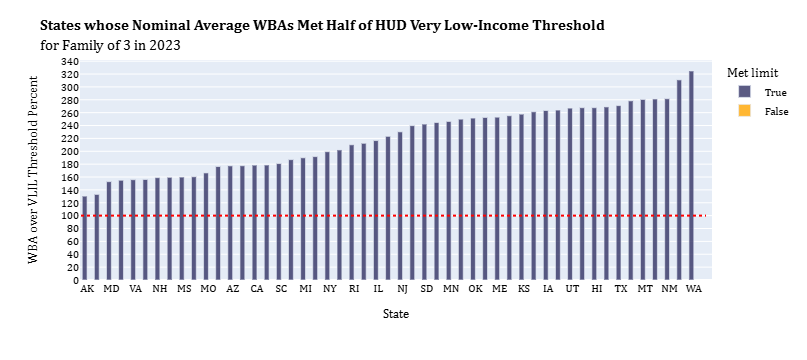

In [34]:
fig1 = px.bar(avgwba.sort_values(by='WBA-Limit Ratio'), 
             x='State', 
             y='WBA-Limit Ratio', 
             color = 'Met limit',
             color_discrete_sequence=['rgba(50,50,100,0.8)', 'rgba(255, 165, 0,0.8)'],
             width=2000)
fig1.update_layout(
    title_text="<b>States whose Nominal Average WBAs Met Half of HUD Very Low-Income Threshold</b> <br>for Family of 3 in 2023",
    barmode='group',
                   xaxis_title="State", yaxis_title="WBA over VLIL Threshold Percent",
                   font=dict(
                        family="Cambria",  
                        size=11,         
                        color="black",
                    ),
                   yaxis=dict(
                        tick0=0,          
                        dtick=20 
                    )
                  )
fig1.update_traces(width=0.4) 
fig1.add_shape(
    type="line",
    x0=-0.5,
    x1=51,
    y0=100,
    y1=100,
    line=dict(
        color="red",
        width=2,
        dash="dot"
    )
)
fig1.show()

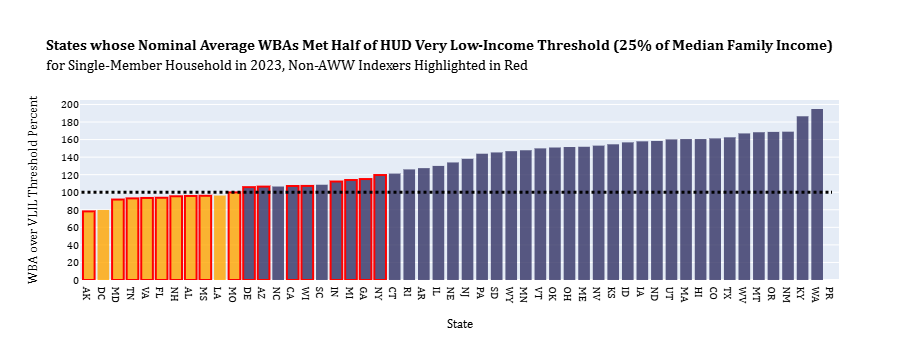

In [39]:
fig1 = px.bar(avgwba.sort_values(by='WBA-Limit Ratio'), 
             x='State', 
             y='WBA-Limit Ratio', 
             color = 'Met limit',
             color_discrete_sequence=['rgba(255, 165, 0,0.8)', 'rgba(50,50,100,0.8)'],
             width=2000)

nonindexers_list = ['AK', 'AL', 'AZ', 'CA', 'DE', 'FL', 'GA', 'IN', 'MD',
                    'MI', 'MO', 'MS', 'NH', 'NY', 'TN', 'VA', 'WI']
avgwba_sorted = avgwba.sort_values(by='WBA-Limit Ratio')
fig1 = go.Figure()

for i, row in avgwba_sorted.iterrows():
    is_nonindexer = row["State"] in nonindexers_list
    fill_color = 'rgba(255, 165, 0,0.8)' if row["Met limit"] == False else 'rgba(50,50,100,0.8)'
    line_color = 'red' if is_nonindexer else fill_color 
    fig1.add_trace(go.Bar(
        x=[row["State"]],
        y=[row["WBA-Limit Ratio"]],
        marker=dict(
            color=fill_color,
            line=dict(color=line_color, width=2 if is_nonindexer else 0)
        ),
        showlegend=False  # Optional: manage legend manually
    ))

# Update layout
fig1.update_layout(
    title_text="<b>States whose Nominal Average WBAs Met Half of HUD Very Low-Income Threshold (25% of Median Family Income)</b> <br>for Single-Member Household in 2023, Non-AWW Indexers Highlighted in Red",
    xaxis_title="State",
    yaxis_title="WBA over VLIL Threshold Percent",
    font=dict(family="Cambria", size=11, color="black"),
    width=2000,
    yaxis=dict(tick0=0, dtick=20)
)

# Add dotted threshold line at y=100
fig1.add_shape(
    type="line",
    x0=-0.5,
    x1=51,
    y0=100,
    y1=100,
    line=dict(color="black", width=3, dash="dot")
)

fig1.show()

In [40]:
write_html(fig1, 'fig_10.html')